# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [16]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


from sklearn.metrics import classification_report


In [2]:
df=pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [3]:
df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:xlabel='CreditAmount', ylabel='Count'>

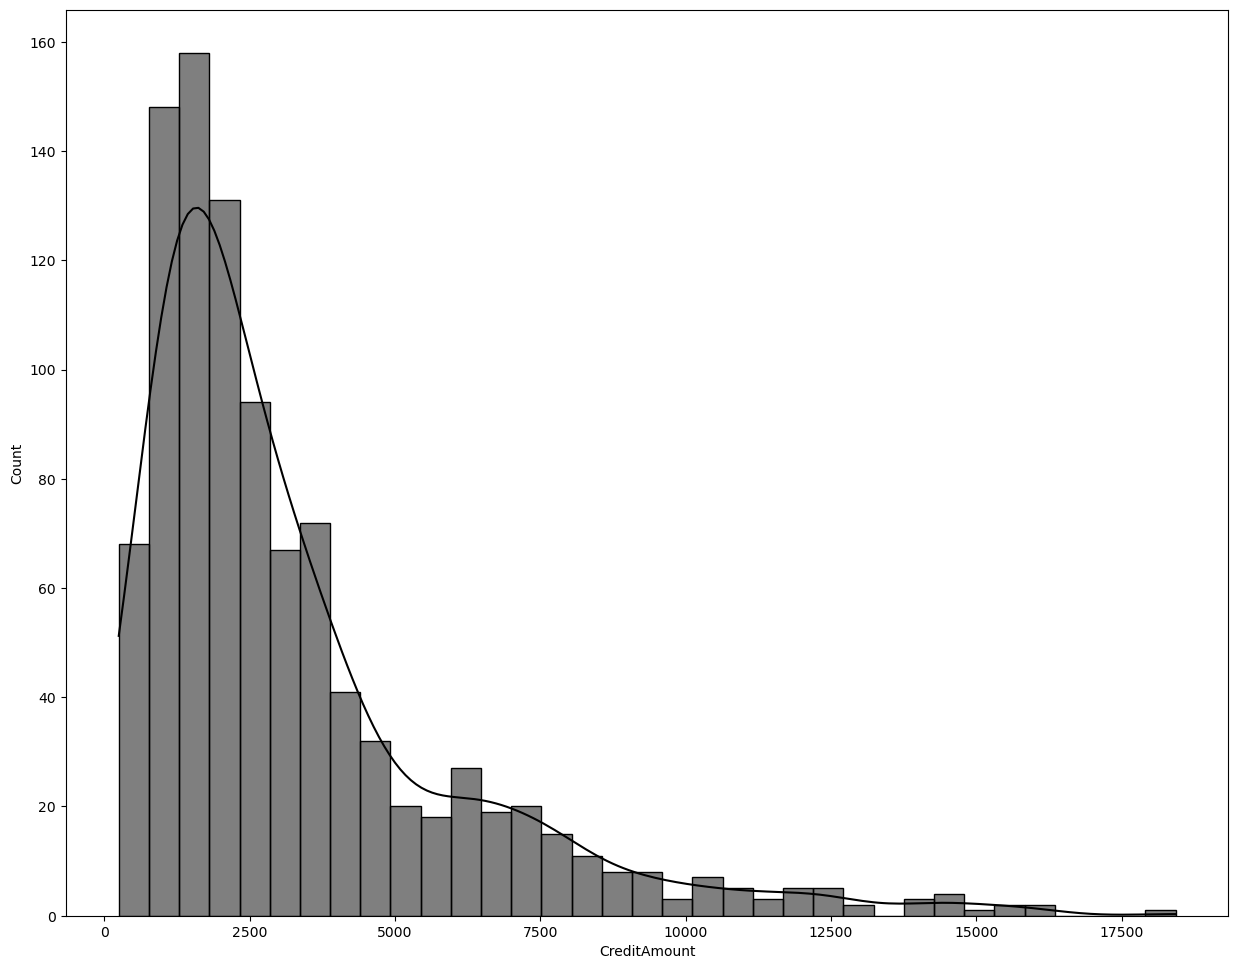

In [4]:
plt.figure(figsize=(15,12),dpi=100)
sns.histplot(data=df,x='CreditAmount',kde=True,color='Black')

# 3b. Create creditability dataframe

In [5]:
df=pd.get_dummies(data=df,columns=['Creditability'])

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [6]:
df.head()

,CreditAmount,DurationOfCreditInMonths,Creditability_0,Creditability_1
0,1049,18,0,1
1,2799,9,0,1
2,841,12,0,1
3,2122,12,0,1
4,2171,12,0,1


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

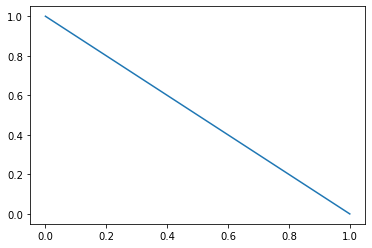

In [7]:
plt.plot(df['Creditability_0'],df['Creditability_1'])
plt.show()

# 6. Prepare input data for the model

In [8]:
df.drop(columns='Creditability_0',inplace=True)

In [9]:
#splitting data into train and test
#splitting data into train and test subset
x_train, x_test,y_train,y_test=train_test_split(df.iloc[:,[0,1]],df['Creditability_1'],test_size=0.3,random_state=2)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (700, 2)
y_train (700,)
x_test (300, 2)
y_test (300,)


# 7. Fit logistic regression model

In [12]:
#adding constant
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [17]:
#building model on training data
logreg_model=sm.Logit(y_train,x_train).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: 4.091501
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Creditability_1   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                     inf
Time:                        22:13:26   Log-Likelihood:                -2864.1
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7823      0.179      9.958      0.000       1.432

In [26]:
y_test_pred_prob=logreg_model.predict(x_test)

In [27]:
y_test_pred=[1 if i>0.5 else 0 for i in y_test_pred_prob]

# 8. Test accuracy calculation

In [29]:
accuracy_score(y_test,y_test_pred)

0.6733333333333333

# 9. Build a confusion matrix

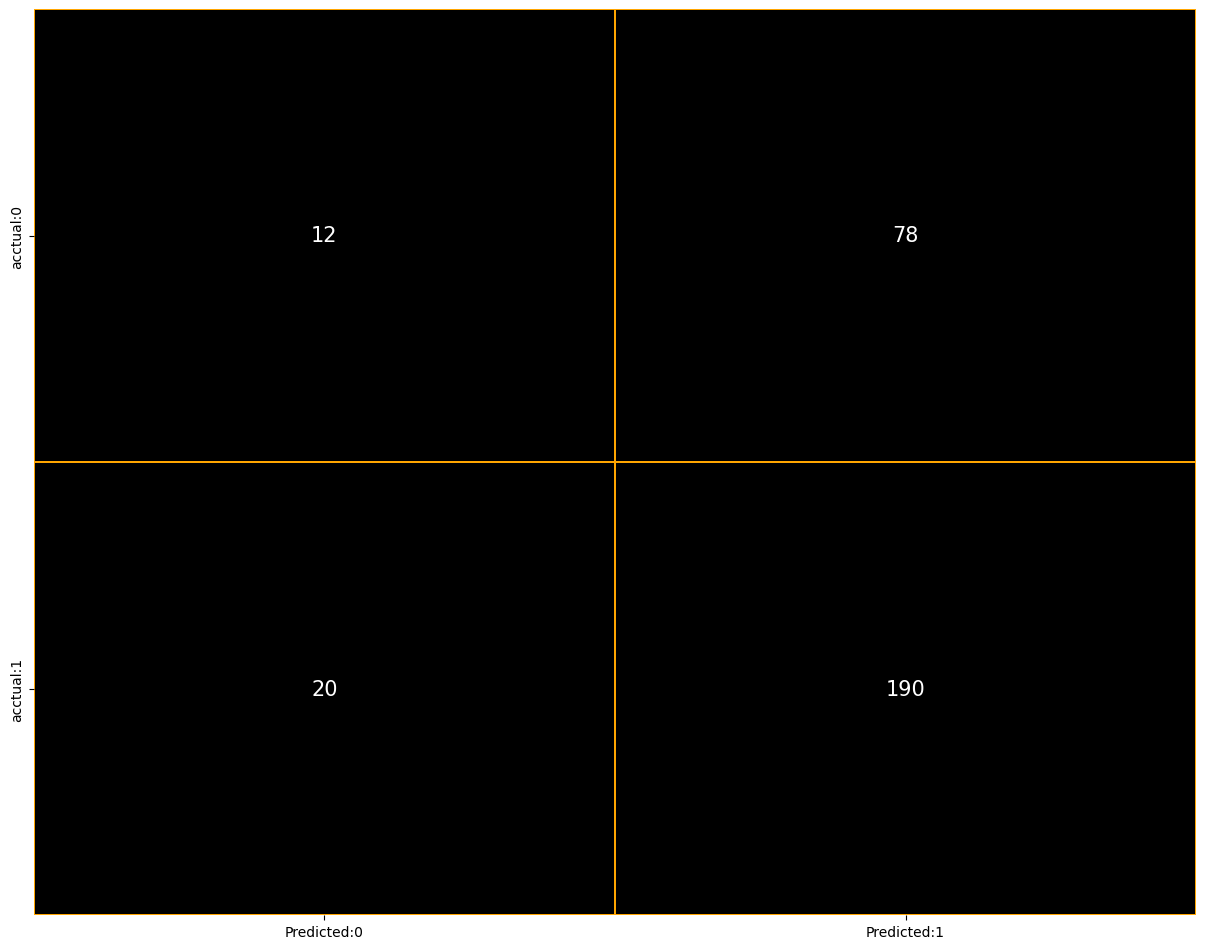

In [42]:
plt.figure(figsize=(15,12),dpi=100)
cm=confusion_matrix(y_test,y_test_pred)
conf_metrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['acctual:0','acctual:1'])
sns.heatmap(data=conf_metrix, annot=True ,fmt='d',cbar=False ,cmap=ListedColormap(['Black']),annot_kws={'size':15},
           linecolor='Orange',linewidths=0.1)
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

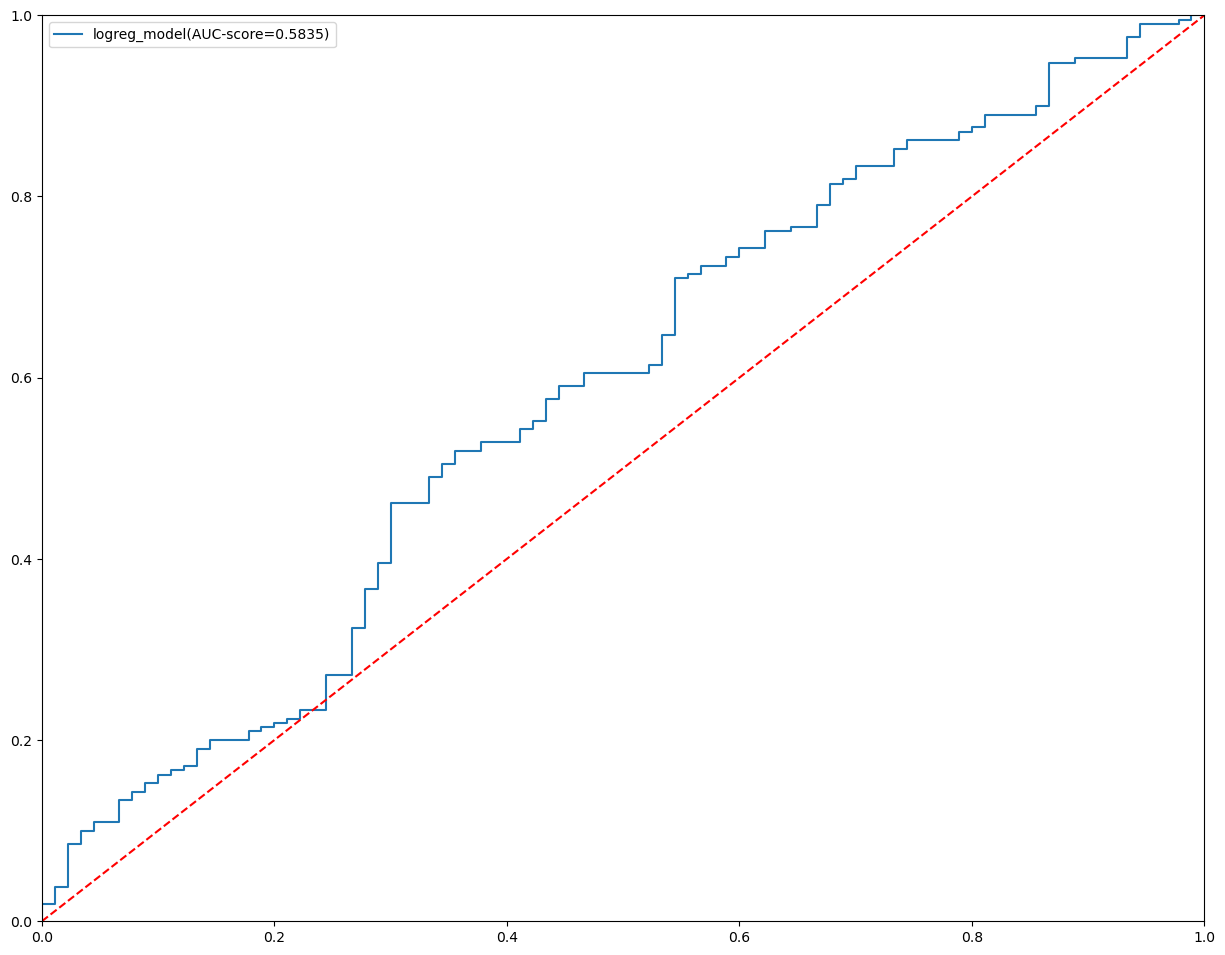

In [40]:
plt.figure(figsize=(15,12),dpi=100)
fpr ,tpr, thresholds=roc_curve(y_test,y_test_pred_prob)
plt.plot(fpr,tpr,label='logreg_model(AUC-score=%0.4f)'%metrics.roc_auc_score(y_test,y_test_pred_prob))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.show()